# Étude d'une chute libre

Tiré d'un [document Éduscol](https://eduscol.education.fr/1648/programmes-et-ressources-en-physique-chimie-voie-gt).

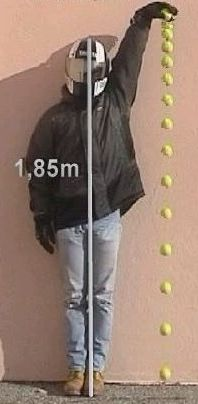

Image tirée de [ac-bordeaux.fr](http://webetab.ac-bordeaux.fr/Pedagogie/Physique/site/labo/tice/c_video_tice.htm)

## Chronophotographie

Cette activité a pour but d’exploiter une **chronophotographie** de la **chute d’une bille**.

**Capacité numérique mise en œuvre :** représenter les positions successives d’un système modélisé par un point lors d’une évolution unidimensionnelle ou bidimensionnelle à l’aide d’un langage de programmation.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Sur une chronophotographie (photo imprimée ou vidéo ouverte dans un logiciel de pointage), on a pointé les positions successives de la balle et relevé les positions successives dans le tableau ci dessous.

In [ ]:
ymes = np.array([-0, -0.7, -1.5, -2.3, -3.5, -4.5, -5.9, -7.7, -8.8,
                 -10.6, -12.3, -14.2, -16.4, -18.5, -21, -23.5])

In [ ]:
print('ymes:', ymes)

Ici, l’expérience dure **0,25 s** et correspond à **16 points de mesure** : il faut donc engendrer 16 instants entre de 0 à 0,25 s (durée de l’expérience). Une base de temps, c’est-à-dire un tableau des valeurs de $t$, peut être construit de manière automatique, à l’aide de la fonction `np.linspace`. Les trois arguments utilisés sont le début, la fin, le nombre de pas.

In [ ]:
t = np.linspace(0, 0.25, 16)
print('t:',t)

## Premier graphe

Le tracé des positions mesurées en fonction du temps est généré grâce à `matplotlib.pyplot`. Python gère automatiquement les échelles, les couleurs, les axes.

In [ ]:
plt.figure()
plt.plot(t, ymes)
plt.show()

## Manipulation de tableau et tracé de la position calculée

**L’ordonnée réelle** est enfin calculée à partir de l’ordonnée mesurée sur la chronophotographie. L’échelle de la photo étant de **2/100**, numpy permet de multiplier directement toutes valeurs du tableau `ymes` par l’échelle et d’automatiser la conversion. Les nouvelles valeurs sont rassemblées dans le tableau `yreelle`. Les fonctions utilisées ensuite servent à « personnaliser » le graphe : étiquettes pour l’abscisse et pour l’ordonnée, grille, légende et titre.

In [ ]:
yreelle = ymes * 2/100

plt.figure()

plt.plot(t, yreelle, 'ro', label="y=f(t)")
plt.xlabel("temps")
plt.ylabel("yreelle")
plt.grid()
plt.legend()
plt.title("chute libre")

plt.show()

## Représentation de la chute

En affectant une abscisse constante $x$, il est possible d’obtenir le tracé des **positions successives de la bille** et ainsi **recréer la chronophotographie**. Le script précédent est repris en indiquant que $x$ est nul pour tout $t$. Cela s’écrit sous la forme `x = 0*t`. Cette écriture est rendue nécessaire car la fonction `plt.plot` doit disposer de deux listes ayant le même nombre de valeurs. La liste `yreelle` contient 16 valeurs. L’abscisse doit également en contenir 16, ce qui ne serait pas le cas si l’on écrivait seulement `x = 0`. Une manière d’écrire cela est :

In [ ]:
x=0*t

plt.figure()

plt.plot(x,yreelle,'ro',label="y=f(x)")
plt.xlabel("position")
plt.ylabel("yreelle")
plt.grid()
plt.legend()
plt.title("chute libre")

plt.show()

## Premier modèle automatique

Dans un premier temps, il est possible d’appeler la fonction `np.polyfit` qui modélise une fonction par un polynôme de degré laissé au choix de l’utilisateur. En choisissant un **polynôme d’ordre 2**, `np.polyfit` recherche la fonction qui à $t$ associe

$$at^2 + bt + c.$$

En nommant la fonction `mod`, `np.polyfit` renvoie un **tableau** avec les valeurs de $a$, $b$ et $c$.

Il est alors possible d’afficher l’une des valeurs de ce tableau (par exemple, la première) grâce à `print(mod[0])` (la numérotation de Python commence toujours à 0 et non à 1). Ainsi, par **comparaison avec les expressions littérales du mouvement** (modélisation de la chute libre verticale au moyen de la **seconde loi de Newton**), il est possible d’obtenir les valeurs :

 - de la **constate de gravitation** $g = - 2a$,
 - de la **vitesse verticale initiale** $v_0 = b$
 - et de la **position initiale** $z_0 = c$.
 
Cela peut être écrit ainsi :

In [ ]:
mod = np.polyfit(t, yreelle, 2)
print('mod :', mod)

print('g = ', -mod[0]*2)
print('vo = ', mod[1])
print('yo = ', mod[2])

**Conclusion** : **l’ordre de grandeur** de la valeur modèle de $g$ ne paraît pas trop éloigné de celui de la valeur tabulée. Une réflexion peut être amorcée sur les **chiffres significatifs**.

## Représentation du modèle

Il est ensuite possible de **superposer la courbe** issue de la modélisation et les **points expérimentaux** :

In [ ]:
ymod = mod[0]*t**2 + mod[1] * t + mod[2]

plt.figure()

plt.plot(t,yreelle,'ro',label="yréelle=f(t)")
plt.plot(t,ymod,'b-',label="ymod=f(t)")

plt.xlabel("temps")
plt.ylabel("yreelle")
plt.grid()
plt.title("chute libre et son modèle")
plt.legend()

plt.show()

## Vecteurs déplacement et boucle for

Comme précédemment, la liste des valeurs successives de $x$ est générée par `x = 0 * t` pour faire tracer les **vecteurs en fonction** de la position $x = 0$. Ensuite, la **boucle `for`** permet faire défiler les différentes positions de la bille grâce à l’instruction `for i in range(...)`. Attention à ne pas oublier les « : » après l’instruction `for`, car Python renverrait un message d’erreur sans cela.

In [ ]:
plt.figure()

for i in range(0, len(t) - 1):
    plt.arrow(0, yreelle[i], 0, yreelle[i+1] - yreelle[i],
              fc="k", ec="k", head_width=0.005, head_length=0.01)

plt.ylim(-0.6, 0.1)
plt.xlim(-0.1, 0.1)

plt.show()